In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/CUOI KY/TRAIN',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 9597 images belonging to 15 classes.


In [ ]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/CUOI KY/TEST',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 3496 images belonging to 15 classes.


In [ ]:
training_set.class_indices

{'Anh_dao': 0,
 'Bach_dang_nk': 1,
 'Dang_huong': 2,
 'Hoang_dan': 3,
 'Lim': 4,
 'Mit_mat': 5,
 'Mun': 6,
 'Muong_den': 7,
 'Po_mu': 8,
 'Sa_moc_dau': 9,
 'Soi_do': 10,
 'Tau_mat': 11,
 'Thuy_tung': 12,
 'Trai_li': 13,
 'mun_soc': 14}

In [ ]:
validation.class_indices

{'Anh_dao': 0,
 'Bach_dang_nk': 1,
 'Dang_huong': 2,
 'Hoang_dan': 3,
 'Lim': 4,
 'Mit_mat': 5,
 'Mun': 6,
 'Muong_den': 7,
 'Po_mu': 8,
 'Sa_moc_dau': 9,
 'Soi_do': 10,
 'Tau_mat': 11,
 'Thuy_tung': 12,
 'Trai_li': 13,
 'mun_soc': 14}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(15,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=15,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/15
300/300 [==============================] - 6111s 20s/step - loss: 1.9158 - accuracy: 0.3898 - val_loss: 1.0121 - val_accuracy: 0.6485
Epoch 2/15
300/300 [==============================] - 2164s 7s/step - loss: 0.6837 - accuracy: 0.7699 - val_loss: 0.6674 - val_accuracy: 0.7686
Epoch 3/15
300/300 [==============================] - 2170s 7s/step - loss: 0.4542 - accuracy: 0.8496 - val_loss: 0.4851 - val_accuracy: 0.8287
Epoch 4/15
300/300 [==============================] - 2173s 7s/step - loss: 0.3011 - accuracy: 0.8999 - val_loss: 0.4203 - val_accuracy: 0.8576
Epoch 5/15
300/300 [==============================] - 2168s 7s/step - loss: 0.2752 - accuracy: 0.9107 - val_loss: 0.3558 - val_accuracy: 0.8761
Epoch 6/15
300/300 [==============================] - 2169s 7s/step - loss: 0.1742 - accuracy: 0.9408 - val_loss: 0.3836 - val_accuracy: 0.8730
Epoch 7/15
300/300 [==============================] - 2179s 7s/step - loss: 0.1731 - accuracy: 0.9434 - val_loss: 0.3873 - val_accuracy

In [ ]:
model.save("/content/drive/MyDrive/CUOI KY/CUOIKY.h5")

In [ ]:
model_CNN=load_model('/content/drive/MyDrive/CUOI KY/CUOIKY.h5')

In [ ]:
classes=['Anh_dao','Bach_dang_nk','Dang_huong','Hoang_dan','Lim','Mit_mat','Mun','Muong_den','Po_mu','Sa_moc_dau','Soi_do','Tau_mat',
 'Thuy_tung','Trai_li','mun_soc']

<function matplotlib.pyplot.show>

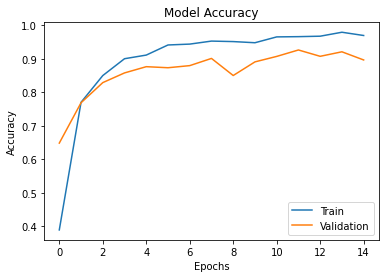

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

'Bach_dang_nk'

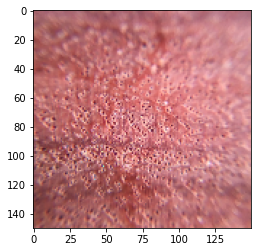

In [ ]:
img = load_img('/content/drive/MyDrive/Thu/1362.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

'Dang_huong'

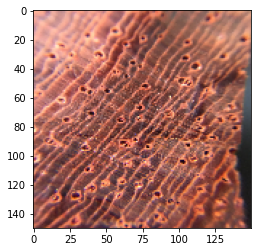

In [ ]:
img = load_img('/content/drive/MyDrive/Thu/15232.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

'Anh_dao'

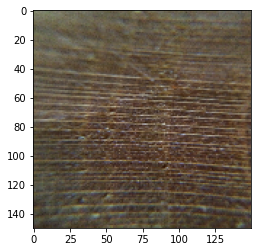

In [ ]:
img = load_img('/content/drive/MyDrive/Thu/171.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

'Po_mu'

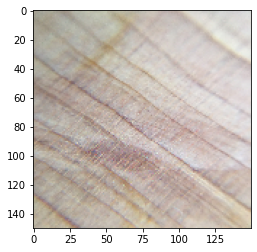

In [ ]:
img = load_img('/content/drive/MyDrive/Thu/24765.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

'Lim'

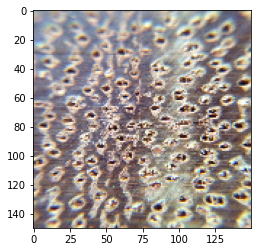

In [ ]:
img = load_img('/content/drive/MyDrive/Thu/32394.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

'Mit_mat'

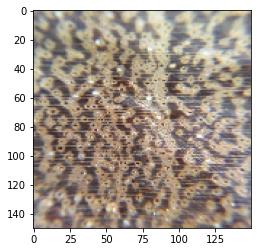

In [ ]:
img = load_img('/content/drive/MyDrive/Thu/34016.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

'Mun'

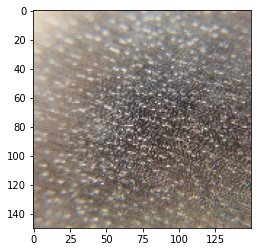

In [ ]:
img = load_img('/content/drive/MyDrive/Thu/36922.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

'mun_soc'

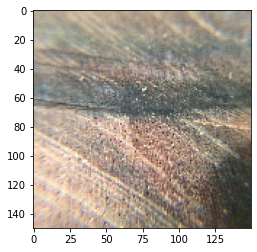

In [ ]:
img = load_img('/content/drive/MyDrive/Thu/39108.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

'Muong_den'

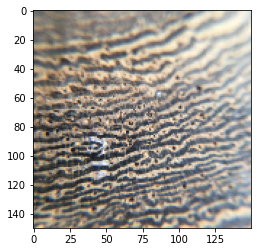

In [ ]:
img = load_img('/content/drive/MyDrive/Thu/40490.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

'mun_soc'

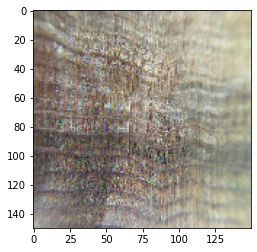

In [ ]:
img = load_img('/content/drive/MyDrive/Thu/46161.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

'Soi_do'

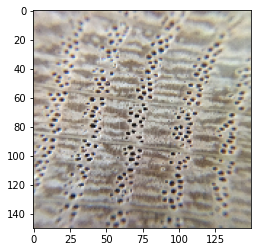

In [ ]:
img = load_img('/content/drive/MyDrive/Thu/49478.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

'Tau_mat'

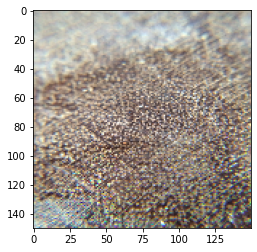

In [ ]:
img = load_img('/content/drive/MyDrive/Thu/50904.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

'Thuy_tung'

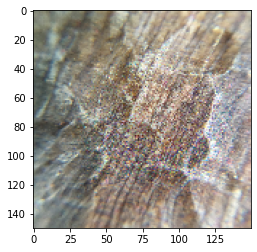

In [ ]:
img = load_img('/content/drive/MyDrive/Thu/53685.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

'Trai_li'

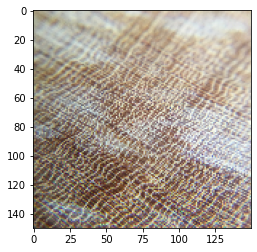

In [ ]:
img = load_img('/content/drive/MyDrive/Thu/54853.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

'Po_mu'

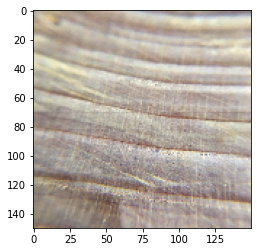

In [ ]:
img = load_img('/content/drive/MyDrive/Thu/42900.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_CNN.predict(img),axis=1)
classes[int(a)]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File ‘colab_pdf.py’ already there; not retrieving.



In [ ]:
from colab_pdf import colab_pdf
colab_pdf('Untitled7.ipynb')





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Untitled7.ipynb to pdf
[NbConvertApp] Support files will be in Untitled7_files/
[NbConvertApp] Making directory ./Untitled7_files
[NbConvertApp] Making directory ./Untitled7_files
[NbConvertApp] Making directory ./Untitled7_files
[NbConvertApp] Making directory ./Untitled7_files
[NbConvertApp] Making directory ./Untitled7_files
[NbConvertApp] Making directory ./Untitled7_files
[NbConvertApp] Making directory ./Untitled7_files
[NbConvertApp] Making directory ./Untitled7_files
[NbConvertApp] Making directory ./Untitled7_files
[NbConvertApp] Making directory ./Untitled7_files
[NbConvertApp] Making directory ./Untitled7_files
[NbConvertApp] Making directory ./Untitled7_files
[NbConvertApp] Making directory ./Untitled7_files
[NbConvertApp] Making directory ./Untitled7_files
[NbConvertApp] Making directory ./Untitled7_files
[NbConvertApp] Making directory ./Untitled7_files
[NbConvertApp] Writing 66260 bytes to ./no

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'